# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Christina Ho
- Doljinsuren Zandanshatar
- Janine Hou
- Lawrence Ngo
- Tatjana Tam

# Group Members IDs

- A13542382
- A13756923
- A12998815
- A13466300
- A14064063

# Research Question

   In our data science project we ask the question: is there a relationship between the type of curse words used in Quentin Tarantino’s movies (from 1992-2012 excluding Death Proof) and the success of those movies? By grouping all the curse words into the four categories of swear words as defined by Professor Benjamin Bergen (religious concept, sexual activities, bodily functions and organs, and social language for other social groups), we will analyze the category frequency per film with different metrics of success. We will explore success by comparing each movie’s net gross (in dollars), critical success (as a percent), and Academy awards (in numbers). 


## Background and Prior Work

Quentin Tarantino is a well-established, acclaimed, and successful director best known for the unique style of his films. Some hallmarks of his films include non-linear storytelling, satire, and pop culture references. Tarantino is also known for employing numerous instances of stylized, graphic violence and an abundance of profanity throughout all of his films and thus they have all garnered “R” ratings. Based on the common theme of swear words and given the success and popularity of his films, our team wondered if there was any correlation between the types of swear words spoken and each film’s success. 

A previous study of Tarantino’s films has found that the spread of profanity across his movies has not been consistent: over 75% of curse words were found in just three out of seven films studied, and over 90% of cursing in his movies was found in four out of the seven (2). Additionally, Tarantino seems to have a penchant for using various forms of the F-word, as its different forms make up a majority of curse words used in his films (2). The study also found that the types of swear words employed vary in proportion across movies depending on the type of film it was: for instance, while the F-word makes up a majority of curse words uttered in most of Tarantino’s films,  Django Unchained was an exception in that it featured far more racial slurs compared to other types of swearing since it was a period piece about slavery (2). It was also noted that Tarantino’s use of “R-rated” swear words such as the F-word has decreased in recent years, possibly due to increasing mainstream popularity of his films (2).

Another study has shown that while the amount of expletives has actually decreased in teen-oriented films over the years, it has increased in teen-oriented television shows (1). In addition, there is a difference in the type of swear words used and how often it is used between genders (1). This led us to explore whether swear words, and specifically what types, in Quentin Tarantino’s movies had an effect on how successfully the film performed.


References (include links):
- 1)  https://scholarsarchive.byu.edu/cgi/viewcontent.cgi?article=1136&context=facpub

- 2) http://rstudio-pubs-static.s3.amazonaws.com/235553_58fbac0330f0432e9be75dca4df07b6b.html


# Hypothesis


   We expect that movies with the highest amount of swear words related to sexual activity will be most successful as a whole (equally weighing net gross, critical success, and awards) since these are very prevalent in mainstream society and used very frequently, however it will be interesting to see how each category relates to different type of success (perhaps movies with high amounts of social swear words will amount in the greatest award success due to the sensitivity of the subject).

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

- Dataset Name: Tarantino
- Link to the dataset: https://github.com/fivethirtyeight/data/tree/master/tarantino
- Number of observations: 1895
- Description: This dataset contains entries of all curse words, deaths, and their time location that have occurred in Quentin Tarantino's movies from 1992 - 2012 excluding Death Proof.


- Dataset Name: IMDB 5000
- Link to the dataset: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset
- Number of observations: 5044
- Description: This dataset contains entries of 5000+ movies and their related information found on IMDB such as, IMDB score, budget, gross, and etc. 


- Dataset Name: The Academy Awards 1927-2015
- Link to the dataset: https://www.kaggle.com/theacademy/academy-awards
- Number of observations: 9964
- Description: This dataset contains entries of all Academy Award nominations, their category, and whether they won.


We plan to use the Tarantino dataset to categorize the curse words used in his specified films and compare them to the different measures of success, such as, net gross and critical success through IMDB 5000's variables, gross, budget, and IMDB score, and Academy Awards success through the Academy Award 1927-2015' winning variable.


# Setup

In [1]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
movie_list=['Reservoir Dogs', 'Pulp Fiction', 'Jackie Brown', 'Kill Bill: Vol. 1', 'Kill Bill: Vol. 2', 'Inglourious Basterds', 'Django Unchained']
religion=['goddamned', 'bastards', 'bastard', 'goddamn', 'damn', 'damned', 'hell']
sexual=['fucked', 'fucking', 'fuck', 'fucks', 'fucker', 'fuckers', 'fuckup', 'motherfucker',  'cockblockery',  'fuckface', 'cocksucker', 'fuckhead', 'motherfuckers', 'motherfucking']
body=['dick', 'dicks', 'dumbass','jackass', 'shit', 'shitload', 'horseshit',  'shittiest', 'pussy', 'bullshit', 'shitless', 'shitting', 'horeshit', 'merde', 'shithead',  'chickenshit', 'dickless', 'ass', 'asses', 'asshole', 'assholes', 'asshead', 'shitty']
social=['slut', 'squaw', 'negro', 'negro ', 'jew', 'jew (verb)', 'n-word','n-word ', 'gook', 'gooks', 'slope', 'bitch', 'bitches', 'faggot', 'jap', 'japs', 'wetback', 'cunt', 'cunts',]

words = pd.read_csv('tarantino.csv')
words['movie'] = words['movie'].replace('Inglorious Basterds', 'Inglourious Basterds')
words = words.drop(['minutes_in', 'type'], axis=1)
words = words.dropna()
words['category'] = np.nan
words.loc[words['word'].isin(religion), 'category'] = 'religion'
words.loc[words['word'].isin(sexual), 'category'] = 'sexual'
words.loc[words['word'].isin(body), 'category'] = 'bodily'
words.loc[words['word'].isin(social), 'category'] = 'social'
sorterIndex = dict(zip(movie_list,range(len(movie_list))))
words['movie_rank'] = words['movie'].map(sorterIndex)
words.sort_values(['movie_rank'], ascending = [True], inplace = True)


print(words['category'].isnull().sum())
#print(words['category'].isnull())
print(words)

imdb = pd.read_csv('movie_metadata.csv')
imdb = imdb.drop(imdb[imdb.director_name != 'Quentin Tarantino'].index)
imdb = imdb.drop(706)
imdb = imdb.loc[:,['movie_title', 'gross', 'budget', 'imdb_score', 'title_year']]
imdb = imdb.sort_values(['title_year'])
print(imdb)


awards = pd.read_csv('database.csv')
awards['Film'] = awards['Film'].str.strip()
awards['Name'] = awards['Name'].str.strip()
awards = awards[awards['Film'].isin(movie_list) | awards['Name'].isin(movie_list)]
awards = awards.loc[:,['Winner', 'Film', 'Name']]
for i,award_row in awards.iterrows():
    for movie_index in range(0, len(movie_list)):
        name_storage = awards.loc[i,'Name']
        if name_storage == movie_list[movie_index]:
            film_storage = award_row["Name"]
            awards.loc[i,'Name'] = award_row['Film']
            awards.loc[i,'Film'] = film_storage
awards = awards.loc[:,['Winner', 'Film']]
#awards = awards.drop('Name', axis=1)
print(awards)


0
                 movie          word  category  movie_rank
0       Reservoir Dogs          dick    bodily           0
288     Reservoir Dogs       goddamn  religion           0
287     Reservoir Dogs           ass    bodily           0
286     Reservoir Dogs  motherfucker    sexual           0
285     Reservoir Dogs       fucking    sexual           0
...                ...           ...       ...         ...
1344  Django Unchained       n-word     social           6
1345  Django Unchained           ass    bodily           6
1346  Django Unchained          damn  religion           6
1335  Django Unchained       goddamn  religion           6
1332  Django Unchained       n-word     social           6

[1704 rows x 4 columns]
                movie_title     gross    budget  imdb_score  title_year
4496        Reservoir Dogs   2.81e+06  1.20e+06         8.4      1992.0
3355          Pulp Fiction   1.08e+08  8.00e+06         8.9      1994.0
2930          Jackie Brown   3.96e+07  1.20e+07  

In [3]:
count = words['movie'].unique()
print(count)

['Reservoir Dogs' 'Pulp Fiction' 'Jackie Brown' 'Kill Bill: Vol. 1'
 'Kill Bill: Vol. 2' 'Inglourious Basterds' 'Django Unchained']


# Data Analysis & Results

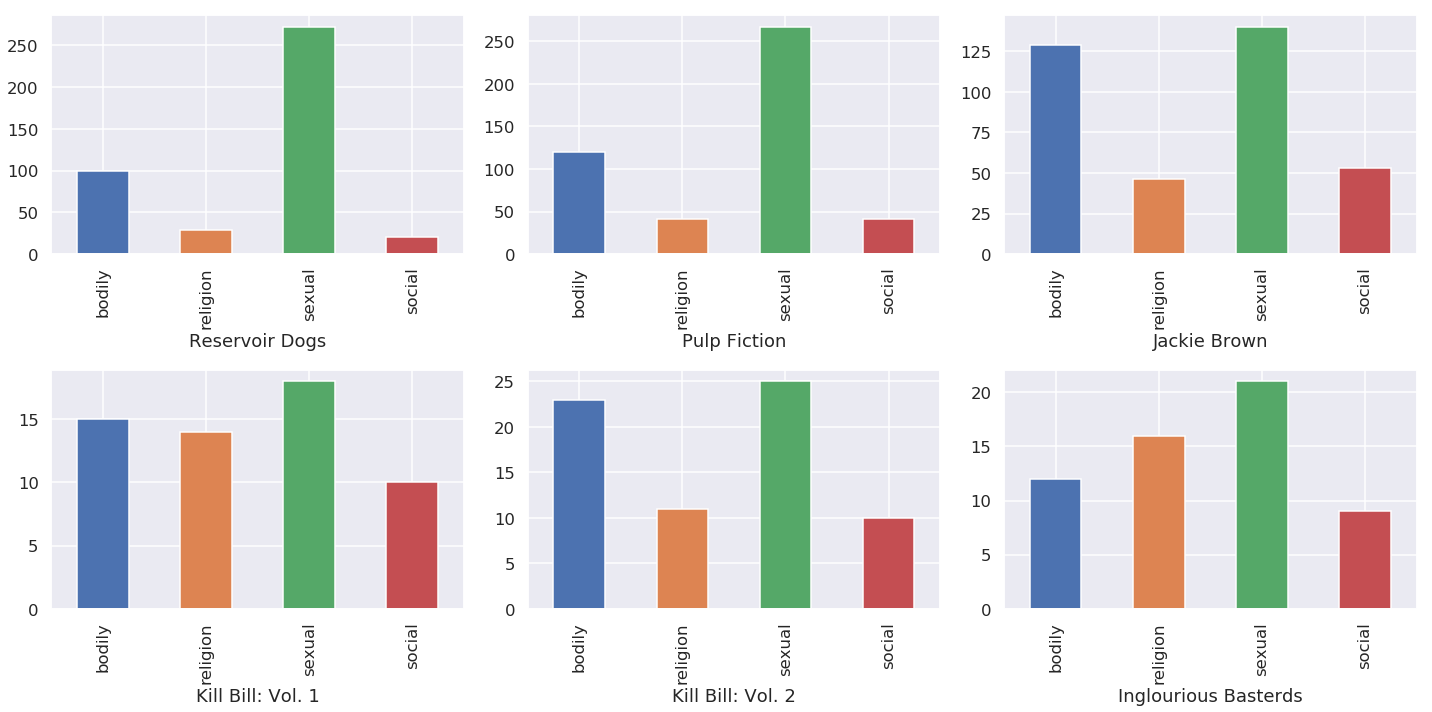

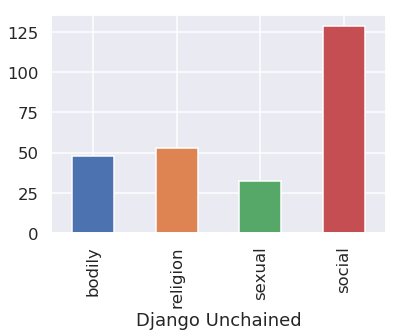

In [4]:
def sum_religion(df):
    return (df.category == 'religion').sum()
def sum_body(df):
    return (df.category == 'bodily').sum()
def sum_sex(df):
    return (df.category == 'sexual').sum()
def sum_social(df):
    return (df.category == 'social').sum()

fig, ar = plt.subplots(2, 3, figsize=(20,10))

#'Reservoir Dogs'
dogs1_df = words.drop(['word'], axis=1)
dogs_df = dogs1_df[dogs1_df['movie'] == 'Reservoir Dogs']
dogs_body = sum_body(dogs_df)
dogs_religion = sum_religion(dogs_df)
dogs_sex = sum_sex(dogs_df)
dogs_social = sum_social(dogs_df)
count_7=[int(dogs_body), int(dogs_religion), int(dogs_sex), int(dogs_social)]
categories_7 = ['bodily', 'religion', 'sexual', 'social']
data_dogs = {'Reservoir Dogs':categories_7,'count_7':count_7}
df_dogs = pd.DataFrame(data_dogs)
dogs_bar = df_dogs.plot.bar(x='Reservoir Dogs', y='count_7', legend=False, ax=ar[0][0])

#'Pulp Fiction'
pulp1_df = words.drop(['word'], axis=1)
pulp_df = pulp1_df[pulp1_df['movie'] == 'Pulp Fiction']
pulp_body = sum_body(pulp_df)
pulp_religion = sum_religion(pulp_df)
pulp_sex = sum_sex(pulp_df)
pulp_social = sum_social(pulp_df)
count_6=[int(pulp_body), int(pulp_religion), int(pulp_sex), int(pulp_social)]
categories_6 = ['bodily', 'religion', 'sexual', 'social']
data_pulp = {'Pulp Fiction':categories_6,'count_6':count_6}
df_pulp = pd.DataFrame(data_pulp)
pulp_bar = df_pulp.plot.bar(x='Pulp Fiction', y='count_6', legend=False, ax=ar[0][1])

#'Jackie Brown'
jackie1_df = words.drop(['word'], axis=1)
jackie_df = jackie1_df[jackie1_df['movie'] == 'Jackie Brown']
jackie_body = sum_body(jackie_df)
jackie_religion = sum_religion(jackie_df)
jackie_sex = sum_sex(jackie_df)
jackie_social = sum_social(jackie_df)
count_5=[int(jackie_body), int(jackie_religion), int(jackie_sex), int(jackie_social)]
categories_5 = ['bodily', 'religion', 'sexual', 'social']
data_jackie = {'Jackie Brown':categories_5,'count_5':count_5}
df_jackie = pd.DataFrame(data_jackie)
jackie_bar = df_jackie.plot.bar(x='Jackie Brown', y='count_5', legend=False, ax=ar[0][2])

#Kill Bill: Vol. 1
kill1_df = words.drop(['word'], axis=1)
kill_df = kill1_df[kill1_df['movie'] == 'Kill Bill: Vol. 1']
kill_body = sum_body(kill_df)
kill_religion = sum_religion(kill_df)
kill_sex = sum_sex(kill_df)
kill_social = sum_social(kill_df)
count_3=[int(kill_body), int(kill_religion), int(kill_sex), int(kill_social)]
categories_3 = ['bodily', 'religion', 'sexual', 'social']
data_kill = {'Kill Bill: Vol. 1':categories_3,'count_3':count_3}
df_kill = pd.DataFrame(data_kill)
kill_bar = df_kill.plot.bar(x='Kill Bill: Vol. 1', y='count_3', legend=False, ax=ar[1][0])

#'Kill Bill: Vol. 2'
kill21_df = words.drop(['word'], axis=1)
kill2_df = kill21_df[kill21_df['movie'] == 'Kill Bill: Vol. 2']
kill2_body = sum_body(kill2_df)
kill2_religion = sum_religion(kill2_df)
kill2_sex = sum_sex(kill2_df)
kill2_social = sum_social(kill2_df)
count_4=[int(kill2_body), int(kill2_religion), int(kill2_sex), int(kill2_social)]
categories_4 = ['bodily', 'religion', 'sexual', 'social']
data_kill2 = {'Kill Bill: Vol. 2':categories_4,'count_4':count_4}
df_kill2 = pd.DataFrame(data_kill2)
kill2_bar = df_kill2.plot.bar(x='Kill Bill: Vol. 2', y='count_4', legend=False, ax=ar[1][1])

#Inglourious Basterds
inglor1_df = words.drop(['word'], axis=1)
inglor_df = inglor1_df[inglor1_df['movie'] == 'Inglourious Basterds']
inglor_body = sum_body(inglor_df)
inglor_religion = sum_religion(inglor_df)
inglor_sex = sum_sex(inglor_df)
inglor_social = sum_social(inglor_df)
count_2=[int(inglor_body), int(inglor_religion), int(inglor_sex), int(inglor_social)]
categories_2 = ['bodily', 'religion', 'sexual', 'social']
data_inglor = {'Inglourious Basterds':categories_2,'count_2':count_2}
df_inglor = pd.DataFrame(data_inglor)
inglor_bar = df_inglor.plot.bar(x='Inglourious Basterds', y='count_2', legend=False, ax=ar[1][2])

#Django Unchained
django1_df = words.drop(['word'], axis=1)
django_df = django1_df[django1_df['movie'] == 'Django Unchained']
django_body = sum_body(django_df)
django_religion = sum_religion(django_df)
django_sex = sum_sex(django_df)
django_social = sum_social(django_df)
count=[int(django_body), int(django_religion), int(django_sex), int(django_social)]
categories = ['bodily', 'religion', 'sexual', 'social']
data_django = {'Django Unchained':categories,'count':count}
df_django = pd.DataFrame(data_django)
django_bar = df_django.plot.bar(x='Django Unchained', y='count', legend=False)

fig.tight_layout()


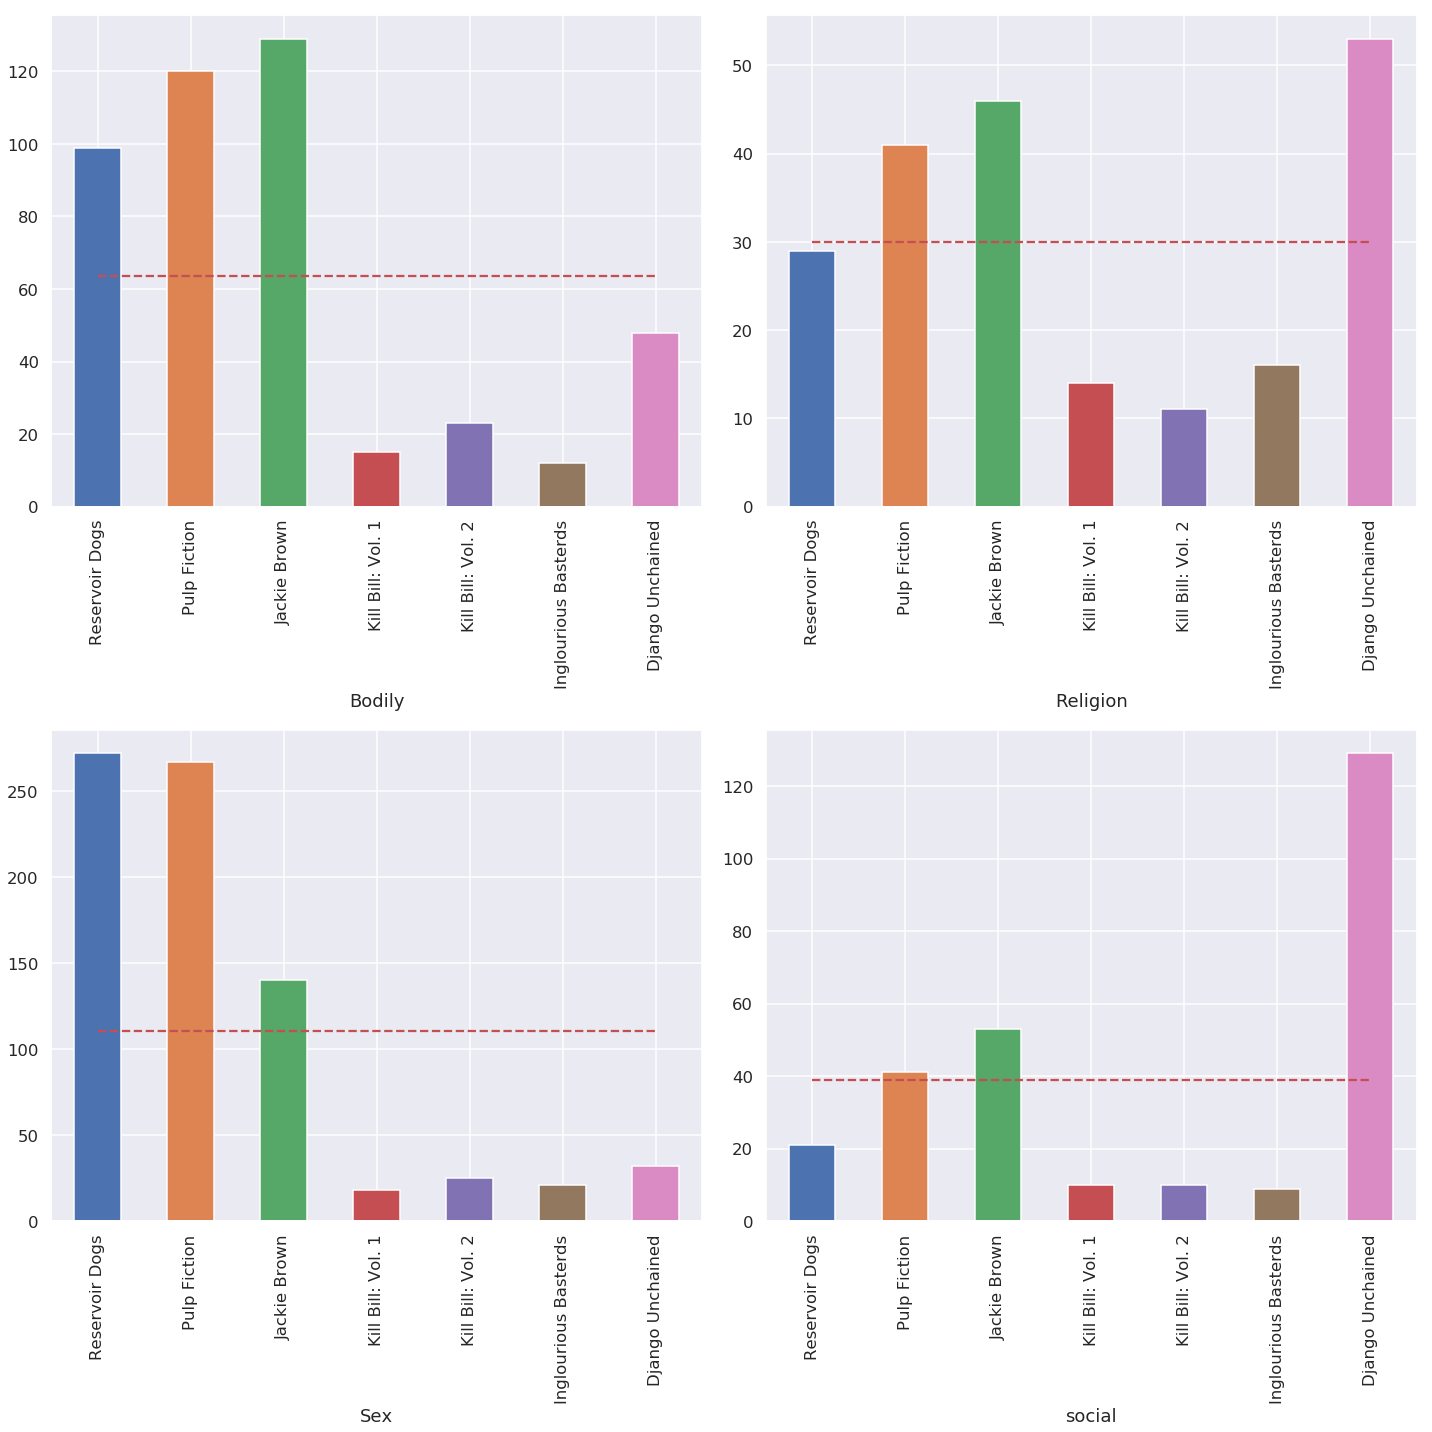

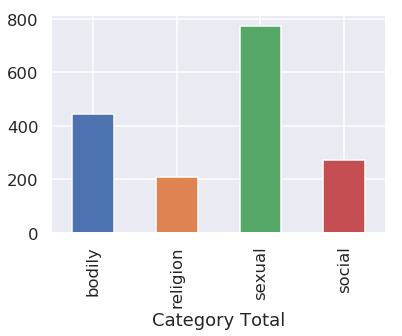

In [14]:
fig, a = plt.subplots(2, 2, figsize=(20,20))

#Categories Through Movies
category_av = words.drop(['word'], axis=1)
category_av_body = sum_body(category_av)
category_av_religion = sum_religion(category_av)
category_av_sex = sum_sex(category_av)
category_av_social = sum_social(category_av)
count_av=[int(category_av_body), int(category_av_religion), int(category_av_sex), int(category_av_social)]
categories_8 = ['bodily', 'religion', 'sexual', 'social']
data_category_av = {'Category Total':categories_8,'count_av':count_av}
df_category_av = pd.DataFrame(data_category_av)
category_av_bar = df_category_av.plot.bar(x='Category Total', y='count_av', legend=False)

movies = ['Reservoir Dogs', 'Pulp Fiction', 'Jackie Brown', 'Kill Bill: Vol. 1', 'Kill Bill: Vol. 2', 'Inglourious Basterds', 'Django Unchained']
#Body Category
count_body=[dogs_body, pulp_body, jackie_body, kill_body, kill2_body, inglor_body, django_body]
data_category_body = {'Bodily':movies,'count_body':count_body}
df_body_av = pd.DataFrame(data_category_body)
body_av_bar = df_body_av.plot.bar(x='Bodily', y='count_body', legend=False, ax=a[0][0])
flat = np.array([category_av_body/7,category_av_body/7,category_av_body/7,category_av_body/7,category_av_body/7,category_av_body/7,category_av_body/7])
a[0][0].plot(df_body_av['Bodily'], flat, 'r--')


#Religion Category
count_religion=[dogs_religion, pulp_religion, jackie_religion, kill_religion, kill2_religion, inglor_religion, django_religion]
data_category_religion = {'Religion':movies,'count_religion':count_religion}
df_religion_av = pd.DataFrame(data_category_religion)
religion_av_bar = df_religion_av.plot.bar(x='Religion', y='count_religion', legend=False, ax=a[0][1])
flat2 = np.array([category_av_religion/7,category_av_religion/7,category_av_religion/7,category_av_religion/7,category_av_religion/7,category_av_religion/7,category_av_religion/7])
a[0][1].plot(df_religion_av['Religion'], flat2, 'r--')

#Sex Category
count_sex=[dogs_sex, pulp_sex, jackie_sex, kill_sex, kill2_sex, inglor_sex, django_sex]
data_category_sex = {'Sex':movies,'count_sex':count_sex}
df_sex_av = pd.DataFrame(data_category_sex)
sex_av_bar = df_sex_av.plot.bar(x='Sex', y='count_sex', legend=False, ax=a[1][0])
flat3 = np.array([category_av_sex/7,category_av_sex/7,category_av_sex/7,category_av_sex/7,category_av_sex/7,category_av_sex/7,category_av_sex/7])
a[1][0].plot(df_sex_av['Sex'], flat3, 'r--')

#Social Category
count_social=[dogs_social, pulp_social, jackie_social, kill_social, kill2_social, inglor_social, django_social]
data_category_social = {'social':movies,'count_social':count_social}
df_social_av = pd.DataFrame(data_category_social)
social_av_bar = df_social_av.plot.bar(x='social', y='count_social', legend=False, ax=a[1][1])
flat4 = np.array([category_av_social/7,category_av_social/7,category_av_social/7,category_av_social/7,category_av_social/7,category_av_social/7,category_av_social/7])
a[1][1].plot(df_social_av['social'], flat4, 'r--')

fig.tight_layout()

Include cells that describe the steps in your data analysis.

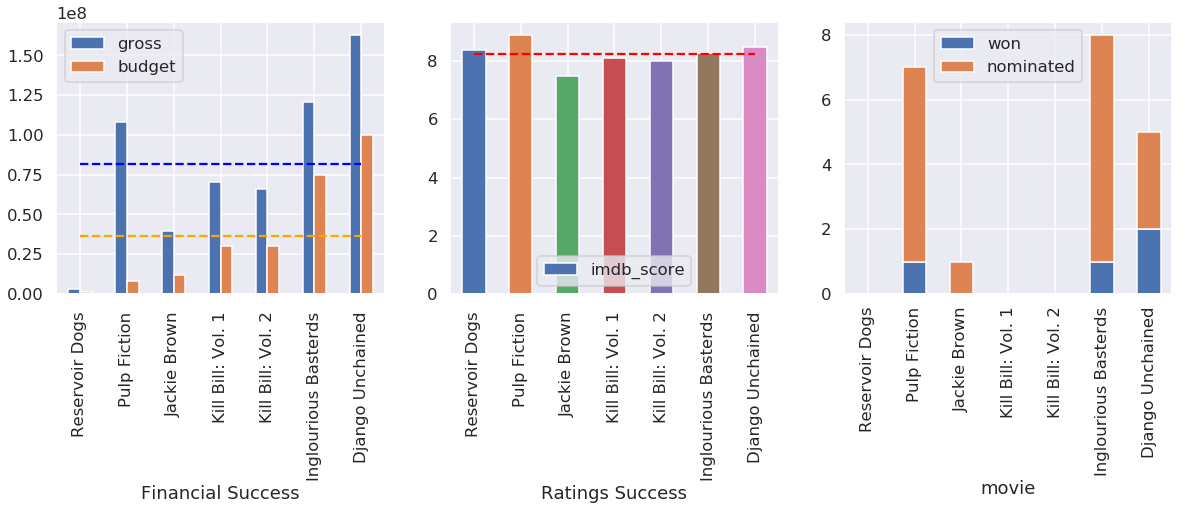

In [17]:
#Success
fig, arr = plt.subplots(1, 3, figsize=(20,5))

#Net Gross
imdb_gross = pd.DataFrame(imdb) #to get right title on graph
imdb_gross['Financial Success'] = imdb['movie_title']
imdb_gross.plot.bar(x='Financial Success', y=['gross','budget'], ax=arr[0])
gross_mean = imdb['gross'].mean()
budget_mean = imdb['budget'].mean()
flat5 = np.array([gross_mean,gross_mean,gross_mean,gross_mean,gross_mean,gross_mean,gross_mean])
arr[0].plot(imdb['movie_title'], flat5, 'r--', color='blue')
flat6 = np.array([budget_mean,budget_mean,budget_mean,budget_mean,budget_mean,budget_mean,budget_mean])
arr[0].plot(imdb['movie_title'], flat6, 'r--', color='orange')

#IMDB score
imdb_success = pd.DataFrame(imdb) #to get right title on graph
imdb_success['Ratings Success'] = imdb['movie_title'] #to get right title on graph
imdb_success.plot.bar(x='Ratings Success', y='imdb_score', ax=arr[1])
score_mean = imdb['imdb_score'].mean()
flat7 = np.array([score_mean,score_mean,score_mean,score_mean,score_mean,score_mean,score_mean])
arr[1].plot(imdb['movie_title'], flat7, 'r--', color='red')

#Awards
award_df = pd.DataFrame(movie_list, columns=['movie'])
award_df['total'] = ''
award_df['won'] = ''
award_df['nominated'] = ''
for i in movie_list:
    allAwards = (awards['Film'] == i).sum()
    won = ((awards['Film'] == i) & (awards['Winner'] == 1.0)).sum()
    award_df.loc[(award_df['movie'] == i), 'total'] =  allAwards
    award_df.loc[(award_df['movie'] == i), 'won'] =  won
    award_df.loc[(award_df['movie'] == i), 'nominated'] = (allAwards - won)
award_df.plot.bar('movie',['won','nominated'],stacked=True, ax=arr[2]);



In [18]:
#Resevoir Dogs
r_sum=int(dogs_body)+ int(dogs_religion)+ int(dogs_sex)+ int(dogs_social)
r_body = int(dogs_body)/int(r_sum)
r_religion = int(dogs_religion)/int(r_sum)
r_sex = int(dogs_sex)/int(r_sum)
r_social = int(dogs_social)/int(r_sum)

# Pulp Fiction
p_sum=int(pulp_body)+ int(pulp_religion)+ int(pulp_sex)+ int(pulp_social)
p_body = int(pulp_body)/int(p_sum)
p_religion = int(pulp_religion)/int(p_sum)
p_sex = int(pulp_sex)/int(p_sum)
p_social = int(pulp_social)/int(p_sum)

#jackie brown
j_sum=int(jackie_body)+ int(jackie_religion)+ int(jackie_sex)+ int(jackie_social)
j_body = int(jackie_body)/int(j_sum)
j_religion = int(jackie_religion)/int(j_sum)
j_sex = int(kill2_sex)/int(j_sum)
j_social = int(kill2_body)/int(j_sum)

#Kill Bill Volume I
k_sum=int(kill_body)+ int(kill_religion)+ int(kill_sex)+ int(kill_social)
k_body = int(kill_body)/int(k_sum)
k_religion = int(kill_religion)/int(k_sum)
k_sex = int(kill_sex)/int(k_sum)
k_social = int(kill_social)/int(k_sum)

#kill bill volume II
k2_sum=int(kill2_body)+ int(kill2_religion)+ int(kill2_sex)+ int(kill2_social)
k2_body = int(kill2_body)/int(k2_sum)
k2_religion = int(kill2_religion)/int(k2_sum)
k2_sex = int(kill2_sex)/int(k2_sum)
k2_social = int(kill2_social)/int(k2_sum)

#inglorious basterds
i_sum= int(inglor_body)+ int(inglor_religion)+ int(inglor_sex)+ int(inglor_social)
i_body = int(inglor_body)/int(i_sum)
i_religion = int(inglor_religion)/int(i_sum)
i_sex = int(inglor_sex)/int(i_sum)
i_social = int(inglor_social)/int(i_sum)

#Django Unchained
d_sum =int(django_body) + int(django_religion)+ int(django_sex)+ int(django_social)
d_body = int(django_body)/int(d_sum)
d_religion = int(django_religion)/int(d_sum)
d_sex = int(django_sex)/int(d_sum)
d_social = int(django_social)/int(d_sum)

In [19]:
x_body=[r_body, p_body, j_body, k_body, k2_body, i_body, d_body]
x_religion =[r_religion, p_religion, j_religion, k_religion, k2_religion, i_religion, d_religion]
x_sex = [r_sex, p_sex, j_sex, k_sex, k2_sex, i_sex, d_sex]
x_social =[r_social, p_social, j_social, k_social, k2_social, i_social, d_social]
award_df['body'] = x_body
award_df['religion'] = x_religion
award_df['sex'] = x_sex
award_df['social'] = x_social
award_df['total'] = award_df['total'].astype(float)

imdb['body'] = x_body
imdb['religion'] = x_religion
imdb['sex'] = x_sex
imdb['social'] = x_social


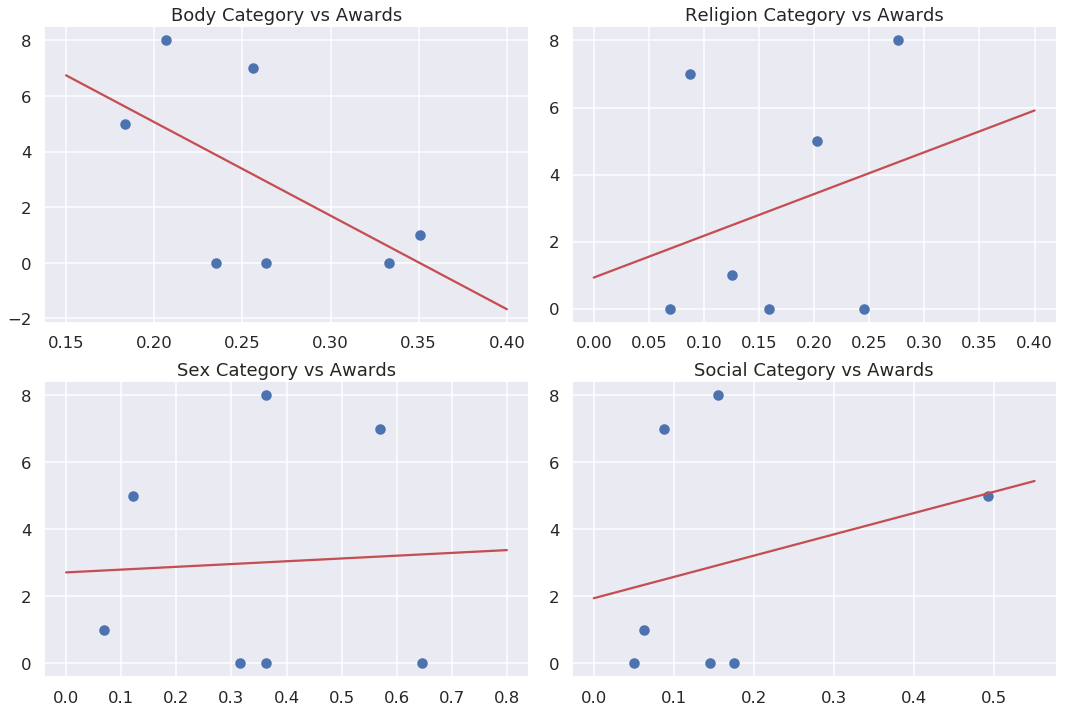

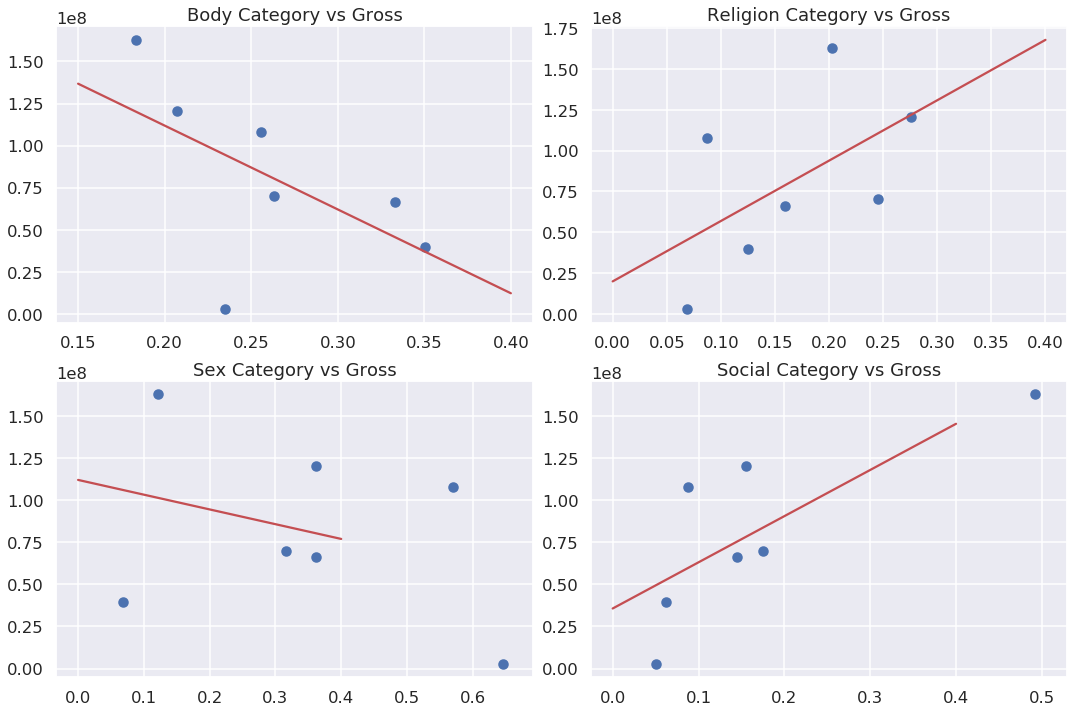

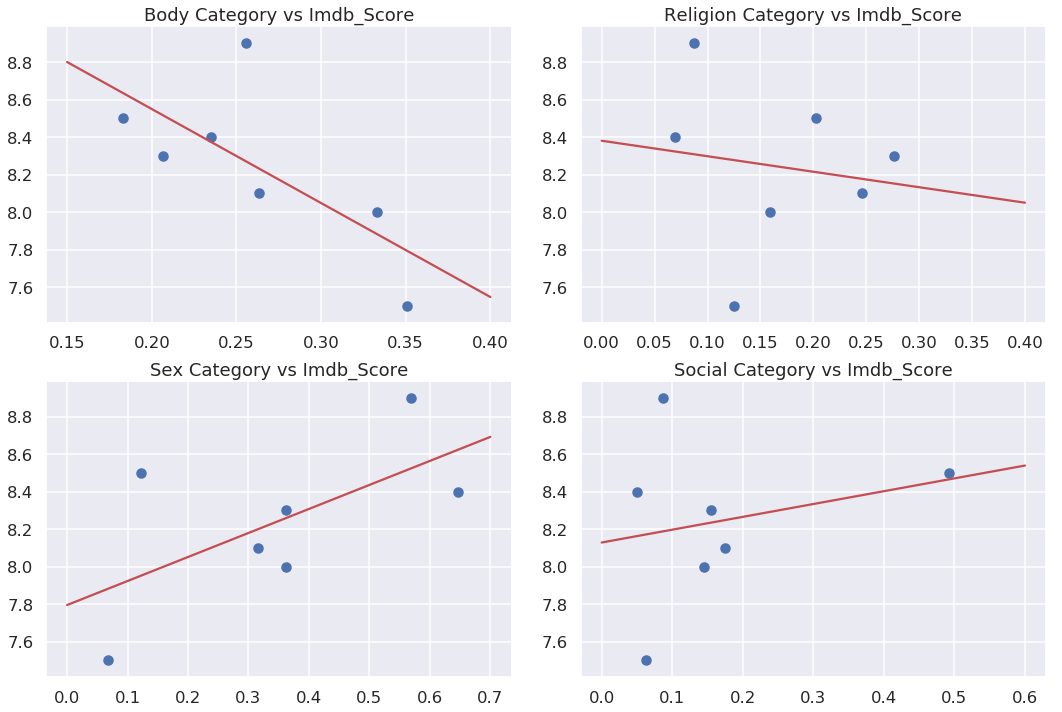

In [21]:
fig, arr = plt.subplots(2,2, figsize=(15,10))
arr[0][0].scatter(x_body, award_df['total'])
a1, b1 = np.polyfit(x_body, award_df['total'], 1)
xs = np.linspace(0.15, 0.4, 100)
ys = a1*xs +b1
arr[0][0].plot(xs, ys, color='r', label=a1)
arr[0][0].title.set_text("Body Category vs Awards")


arr[0][1].scatter(x_religion, award_df['total'])
a2, b2 = np.polyfit(x_religion, award_df['total'], 1)
xs = np.linspace(0.0, 0.4, 100)
ys = a2*xs +b2
arr[0][1].plot(xs, ys, color='r')
arr[0][1].title.set_text("Religion Category vs Awards")

arr[1][0].scatter(x_sex, award_df['total'])
a3, b3 = np.polyfit(x_sex, award_df['total'], 1)
xs = np.linspace(0.0, 0.8, 100)
ys = a3*xs +b3
arr[1][0].plot(xs, ys, color='r')
arr[1][0].title.set_text("Sex Category vs Awards")

arr[1][1].scatter(x_social, award_df['total'])
a4, b4 = np.polyfit(x_social, award_df['total'], 1)
xs = np.linspace(0.0, 0.55, 100)
ys = a4*xs +b4
arr[1][1].plot(xs, ys, color='r')
arr[1][1].title.set_text("Social Category vs Awards")

fig.tight_layout()

fig, arr = plt.subplots(2,2, figsize=(15,10))

arr[0][0].scatter(imdb['body'], imdb['gross'])
c1, d1 = np.polyfit(imdb['body'], imdb['gross'], 1)
xs = np.linspace(0.15, 0.4, 100)
ys = c1*xs +d1
arr[0][0].plot(xs, ys, color='r')
arr[0][0].title.set_text("Body Category vs Gross")

arr[0][1].scatter(imdb['religion'], imdb['gross'])
c2, d2 = np.polyfit(imdb['religion'], imdb['gross'], 1)
xs = np.linspace(0.0, 0.4, 100)
ys = c2*xs +d2
arr[0][1].plot(xs, ys, color='r')
arr[0][1].title.set_text("Religion Category vs Gross")

arr[1][0].scatter(imdb['sex'], imdb['gross'])
c3, d3 = np.polyfit(imdb['sex'], imdb['gross'], 1)
xs = np.linspace(0.0, 0.4, 100)
ys = c3*xs +d3
arr[1][0].plot(xs, ys, color='r')
arr[1][0].title.set_text("Sex Category vs Gross")

arr[1][1].scatter(imdb['social'], imdb['gross'])
c4, d4 = np.polyfit(imdb['social'], imdb['gross'], 1)
xs = np.linspace(0.0, 0.4, 100)
ys = c4*xs +d4
arr[1][1].plot(xs, ys, color='r')
arr[1][1].title.set_text("Social Category vs Gross")

fig.tight_layout()
plt.show()

fig, arr = plt.subplots(2,2, figsize=(15,10))

arr[0][0].scatter(imdb['body'], imdb['imdb_score'])
e1, f1 = np.polyfit(imdb['body'], imdb['imdb_score'], 1)
xs = np.linspace(0.15, 0.4, 100)
ys = e1*xs +f1
arr[0][0].plot(xs, ys, color='r')
arr[0][0].title.set_text("Body Category vs Imdb_Score")

arr[0][1].scatter(imdb['religion'], imdb['imdb_score'])
e2, f2 = np.polyfit(imdb['religion'], imdb['imdb_score'], 1)
xs = np.linspace(0.0, 0.4, 100)
ys = e2*xs +f2
arr[0][1].plot(xs, ys, color='r')
arr[0][1].title.set_text("Religion Category vs Imdb_Score")

arr[1][0].scatter(imdb['sex'], imdb['imdb_score'])
e3, f3 = np.polyfit(imdb['sex'], imdb['imdb_score'], 1)
xs = np.linspace(0.0, 0.7, 100)
ys = e3*xs +f3
arr[1][0].plot(xs, ys, color='r')
arr[1][0].title.set_text("Sex Category vs Imdb_Score")

arr[1][1].scatter(imdb['social'], imdb['imdb_score'])
e4, f4 = np.polyfit(imdb['social'], imdb['imdb_score'], 1)
xs = np.linspace(0.0, 0.6, 100)
ys = e4*xs +f4
arr[1][1].plot(xs, ys, color='r')
arr[1][1].title.set_text("Social Category vs Imdb_Score")

fig.tight_layout()
plt.show()

In [10]:
#Correlation of Variables
display(award_df.corr())
display(imdb.corr())

,total,body,religion,sex,social
total,1.00,-0.58,0.28,0.05,0.27
body,-0.58,1.00,-0.34,-0.21,-0.57
religion,0.28,-0.34,1.00,-0.44,0.47
sex,0.05,-0.21,-0.44,1.00,-0.51
social,0.27,-0.57,0.47,-0.51,1.00


,gross,budget,imdb_score,title_year,body,religion,sex,social
gross,1.00,0.83,0.46,0.76,-0.58,0.54,-0.35,0.78
budget,0.83,1.00,0.15,0.95,-0.63,0.73,-0.50,0.87
imdb_score,0.46,0.15,1.00,-0.04,-0.71,-0.15,0.62,0.24
title_year,0.76,0.95,-0.04,1.00,-0.41,0.84,-0.58,0.80
body,-0.58,-0.63,-0.71,-0.41,1.00,-0.34,-0.21,-0.57
religion,0.54,0.73,-0.15,0.84,-0.34,1.00,-0.44,0.47
sex,-0.35,-0.50,0.62,-0.58,-0.21,-0.44,1.00,-0.51
social,0.78,0.87,0.24,0.80,-0.57,0.47,-0.51,1.00


Descriptive Analysis:
- Size
- Missingness
- Shape
- Central Tendency
- Variability

In [11]:
print(words.shape)
print(imdb.shape)
print(awards.shape)

(1704, 4)
(7, 11)
(21, 2)


In [12]:
null_words = words.isnull().any(axis=1)
print(null_words.sum())

null_imdb = imdb.isnull().any(axis=1)
print(null_imdb.sum())

null_awards = awards.isnull().any(axis=1)
print(null_awards.sum())


0
0
17


In [13]:
Shape (graph and)

SyntaxError: invalid syntax (<ipython-input-13-934086d5183e>, line 1)

In [ ]:
Central Tendency (mean, mode (word frequency), median)

In [ ]:
Variability ()

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*